In [46]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',150)

%matplotlib inline

In [47]:
train  = pd.read_csv('/Users/apple/Desktop/train_E6oV3lV.csv')
test = pd.read_csv('/Users/apple/Desktop/test_tweets_anuFYb8.csv')

In [48]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


### remove the @user or non_character

In [49]:
# remove the defined pattern
def pattern(text,pattern):
    r=re.findall(pattern,text)
    for i in r:
        text=re.sub(i,'',text)
    return text


### Count the # of words and characters for each post

In [50]:
combi = train.append(test, ignore_index=True)
combi['count_word']=combi['tweet'].apply(lambda x: len(str(x).split(" ")))
combi['count_chara']=combi['tweet'].str.len()
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
B)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


TypeError: expected string or bytes-like object

In [35]:

combi['avg_words']=combi['count_chara']/combi['count_word']
combi.head()

,id,label,tweet,count_word,count_chara,avg_words
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,21,102,4.857143
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,22,122,5.545455
2,3,0.0,bihday your majesty,5,21,4.200000
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,17,86,5.058824
4,5,0.0,factsguide: society now #motivation,8,39,4.875000


## EXPLORATORY DATA ANALYSIS

In [36]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49159 entries, 0 to 17196
Data columns (total 6 columns):
id             49159 non-null int64
label          31962 non-null float64
tweet          49159 non-null object
count_word     49159 non-null int64
count_chara    49159 non-null int64
avg_words      49159 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 2.6+ MB


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


###  stop words

In [38]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
train['stopwords']=train['tweet'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,10
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,5
2,bihday your majesty,1
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,5
4,factsguide: society now #motivation,1


### count the #of #

In [39]:
train['hashtags']=train['tweet'].apply(lambda sen:len([x for x in sen.split() if x.startswith("#")]))
train[['tweet','hashtags']].head()

,tweet,hashtags
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,1
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,3
2,bihday your majesty,0
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,1
4,factsguide: society now #motivation,1


### count the digit

In [40]:
train['num']=train['tweet'].apply(lambda sen:len([x for x in sen.split() if x.isdigit()]))

In [41]:
train[['num','tweet']].head()

,num,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


### Captial chara

In [42]:
train['upper']=train['tweet'].apply(lambda sen: len([x for x in sen.split() if x.isupper()]))
train[['tweet','upper']].head()

,tweet,upper
0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,0
1,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0
2,bihday your majesty,0
3,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0
4,factsguide: society now #motivation,0


### stemming

In [43]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

from nltk.stem import PorterStemmer
st=PorterStemmer()
combi['clean']=combi['clean'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

combi['clean'].head()

KeyError: 'clean'

### lemmatize

In [107]:
from textblob import Word
combi['clean']=combi['clean'].apply(lambda x: " ".join([Word(word).lemmatize()for word in x.split()]))
combi['clean'].head()

0                   when a father is dysfunct and is so selfish he drag hi kid into hi dysfunction. #run
1    thank for #lyft credit i can't use cau they don't offer wheelchair van in pdx. #disapoint #getthank
2                                                                                    bihday your majesti
3                     #model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4                                                                         factsguide: societi now #motiv
Name: clean, dtype: object

### upper-lower to avoid the same word having different format

In [51]:
# merge test and train to preprocess the text
combi=train.append(test,ignore_index=True,sort=False)
# remove @user
combi['clean']=np.vectorize(pattern)(combi['tweet'],"@[\w]*")

In [52]:
combi['clean']=combi['tweet'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))
combi['clean'].head()

0                        @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1    @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2                                                                                                        bihday your majesty
3                                         #model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4                                                                                        factsguide: society now #motivation
Name: clean, dtype: object

### remove the symbol

In [53]:
combi['clean']=combi['tweet'].str.replace('[^\w\s]','')
combi['clean'].head()

0                    user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run
1    user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked
2                                                                                                   bihday your majesty
3                                                           model   i love u take with u all the time in urð ðððð
ððð  
4                                                                                  factsguide society now    motivation
Name: clean, dtype: object

### remove the stop words

In [54]:
from nltk.corpus import stopwords
combi['clean']=combi['clean'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))
combi['clean'].head()

0                                         user father dysfunctional selfish drags kids dysfunction run
1    user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2                                                                                       bihday majesty
3                                                                model love u take u time urð ðððð ððð
4                                                                        factsguide society motivation
Name: clean, dtype: object

### remove rare words and common words

In [55]:
freq=pd.Series(' '.join(combi['clean']).split()).value_counts()[:10]
freq

user     26976
love      4099
ð         3834
day       3318
â         2732
happy     2584
amp       2386
u         1759
im        1740
time      1721
dtype: int64

In [56]:
freq=list(freq.index)
freq

['user', 'love', 'ð', 'day', 'â', 'happy', 'amp', 'u', 'im', 'time']

In [57]:
combi['clean']=combi['clean'].apply(lambda sen:' '.join(x for x in sen.split() if x not in freq))
combi['clean'].head()

0                                    father dysfunctional selfish drags kids dysfunction run
1    thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2                                                                             bihday majesty
3                                                                    model take urð ðððð ððð
4                                                              factsguide society motivation
Name: clean, dtype: object

In [58]:
freq=pd.Series(' '.join(combi['clean']).split()).value_counts()[-10:]
freq=list(freq.index)

In [59]:
combi['clean']=combi['clean'].apply(lambda x:" ".join(x for x in x.split() if x not in freq))
combi['clean'].head()

0                                    father dysfunctional selfish drags kids dysfunction run
1    thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2                                                                             bihday majesty
3                                                                    model take urð ðððð ððð
4                                                              factsguide society motivation
Name: clean, dtype: object

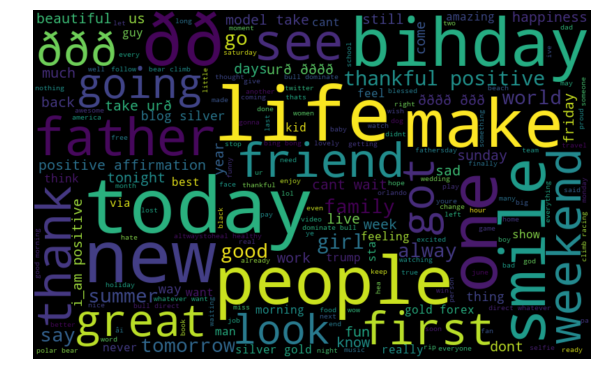

In [60]:
###WordCloud

all_words = ' '.join([text for text in combi['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

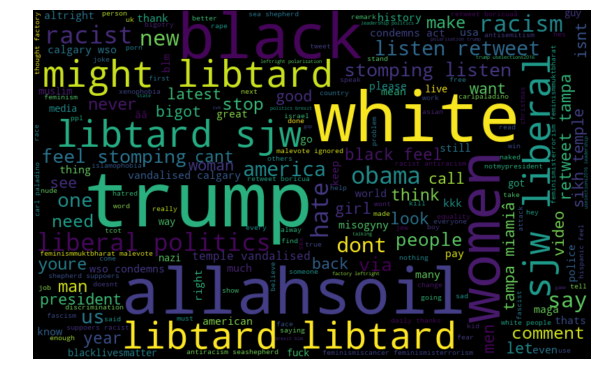

In [61]:
negative_words = ' '.join([text for text in combi['clean'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Bag of words

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['clean'])
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 166907 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]
## merge 

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5284697508896797

In [64]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

### KNN 

### Sentiment Analysis

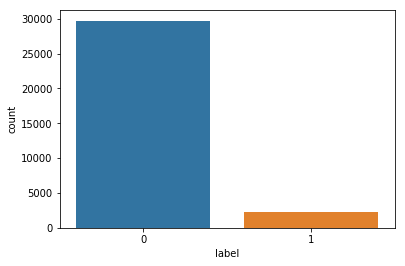

In [26]:
sns.countplot(train['label'])

In [125]:
from textblob import TextBlob
train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['id','tweet','sentiment']].head()

,id,tweet,sentiment
0,1,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,-0.500000
1,2,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,0.200000
2,3,bihday your majesty,0.000000
3,4,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,0.976562
4,5,factsguide: society now #motivation,0.000000
